In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisquare
from scipy.stats import ttest_ind


In [76]:
college_df = pd.read_excel(io='data/geocode_college_with_address.xlsx', index_col=0)

college_df.dtypes

State                           object
Public/Private                   int64
Applicantions Received         float64
Applications Accepted          float64
New Students Enrolled          float64
% New Students from Top 10%    float64
% New Students from Top 25%    float64
# FT undergrad                 float64
# PT undergrad                 float64
in-state tuition               float64
out-of-state tuition           float64
room                           float64
board                          float64
add. fees                      float64
estim. book costs              float64
Estimated Personal Cost        float64
Faculty with PHD               float64
Student to Faculty Ratio       float64
Graduation rate                float64
Latitude                       float64
Longitude                      float64
County                          object
Address1                        object
Address2                        object
Zip Code                        object
Region                   

In [77]:
college_df.shape

(1302, 26)

In [78]:
college_df.columns

Index(['State', 'Public/Private', 'Applicantions Received',
       'Applications Accepted', 'New Students Enrolled',
       '% New Students from Top 10%', '% New Students from Top 25%',
       '# FT undergrad', '# PT undergrad', 'in-state tuition',
       'out-of-state tuition', 'room', 'board', 'add. fees',
       'estim. book costs', 'Estimated Personal Cost', 'Faculty with PHD',
       'Student to Faculty Ratio', 'Graduation rate', 'Latitude', 'Longitude',
       'County', 'Address1', 'Address2', 'Zip Code', 'Region'],
      dtype='object')

## Helper Functions

In [79]:
def IQR_outlier_report(df, column):
    '''
    This function takes in a dataframe and a column name and returns a report
    of the number of outliers in the column based on the IQR method.
    '''
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    print(column)
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

1389.2917038358607

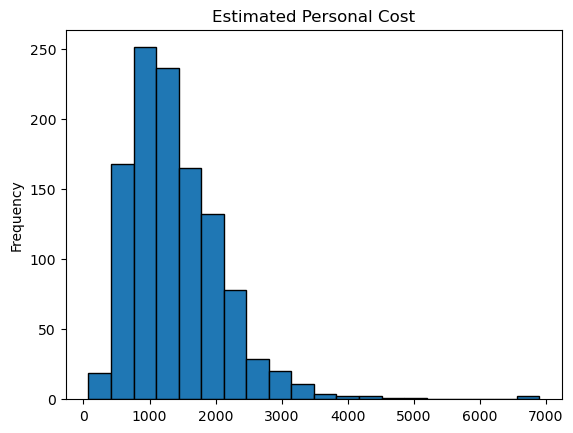

In [80]:
college_df['Estimated Personal Cost'].plot.hist(edgecolor='black', bins=20, title='Estimated Personal Cost')
college_df['Estimated Personal Cost'].mean()

<Axes: ylabel='Applications Accepted'>

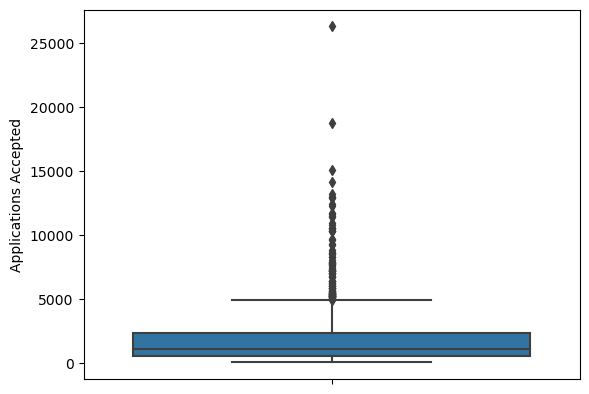

In [81]:
sns.boxplot(data=college_df, y='Applications Accepted')


<Axes: xlabel='Public/Private', ylabel='Applications Accepted'>

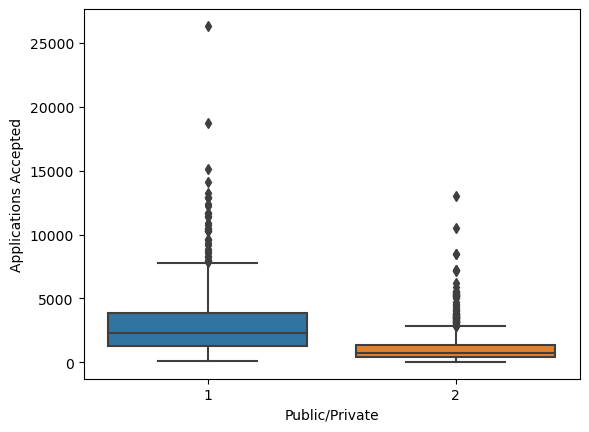

In [82]:
sns.boxplot(data=college_df, x='Public/Private', y='Applications Accepted')
    


<Axes: ylabel='out-of-state tuition'>

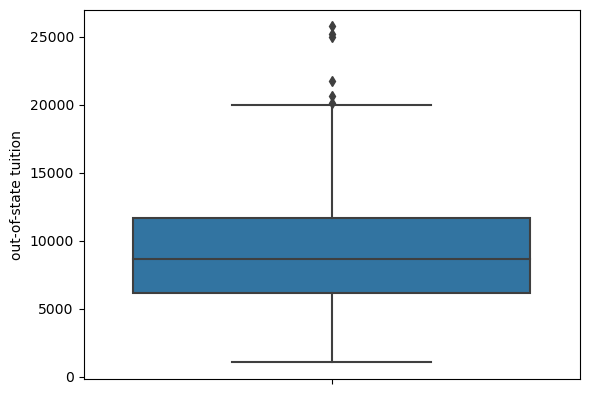

In [83]:
sns.boxplot(data=college_df, y='out-of-state tuition')


<Axes: ylabel='Graduation rate'>

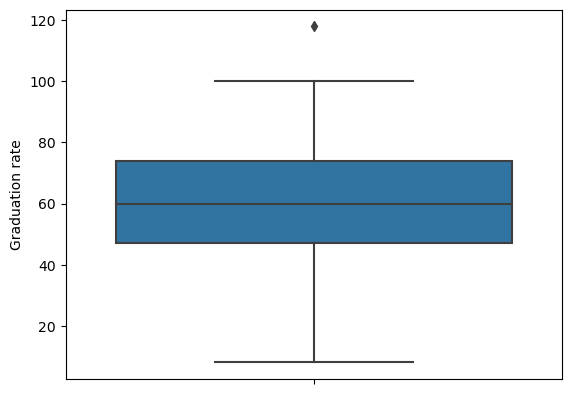

In [84]:
sns.boxplot(data=college_df, y='Graduation rate')


Mean graduation rate for private schools: 66.16753246753247
Mean graduation rate for public schools: 50.18202764976959
The t-statistic is 5.836475237887425 and the p-value is 1.2971603536546654e-08.


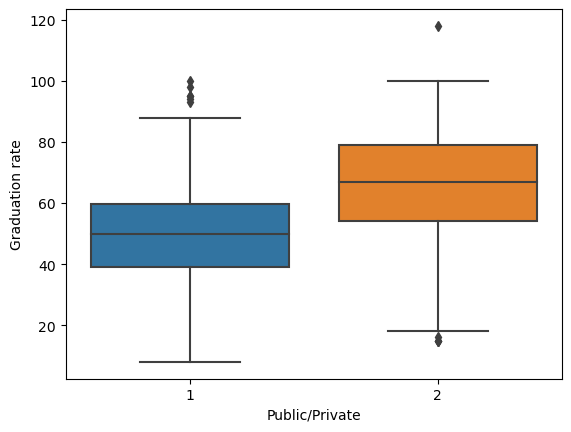

In [85]:
sns.boxplot(data=college_df, y='Graduation rate', x='Public/Private')
mean_graduation_private = college_df[college_df['Public/Private'] == 2]['Graduation rate'].mean()
mean_graduation_public = college_df[college_df['Public/Private'] == 1]['Graduation rate'].mean()
print(f'Mean graduation rate for private schools: {mean_graduation_private}')
print(f'Mean graduation rate for public schools: {mean_graduation_public}')

clean_college_df = college_df.dropna()

(t_stat, p_value ) = ttest_ind(clean_college_df[clean_college_df['Public/Private'] == 2]['Graduation rate'], clean_college_df[clean_college_df['Public/Private'] == 1]['Graduation rate'])
print(f'The t-statistic is {t_stat} and the p-value is {p_value}.')

NameError: name 'college_info_df' is not defined

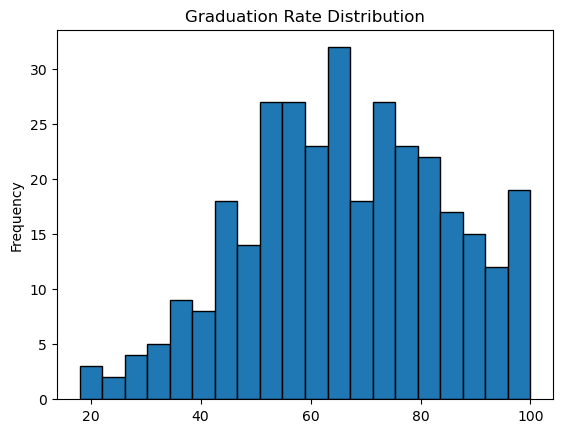

In [86]:
clean_college_df['Graduation rate'].plot(kind='hist', edgecolor='black', bins=20, title='Graduation Rate Distribution')
from scipy.stats import shapiro,kstest
#perform Kolmogorov–Smirnov test for normality
kstest(clean_college_df['Graduation rate'], 'norm')

college_info_df.groupby('Public/Private')['Graduation rate'].mean()



In [ ]:
college_df[college_df['Graduation rate'] > 100]

NameError: name 'college_df' is not defined

In [ ]:
college_df_graduate_rate_mean=college_info_df.groupby('State')['Graduation rate'].mean()
print(type(college_df_graduate_rate_mean))
college_df_graduate_rate_mean.plot(kind='bar', figsize=(20,10), title='Graduation rate by State')

In [ ]:
clean_college_df[clean_college_df['Graduation rate'] > 90].head()


,State,Public/Private,Applicantions Received,Applications Accepted,New Students Enrolled,% New Students from Top 10%,% New Students from Top 25%,# FT undergrad,# PT undergrad,in-state tuition,...,Estimated Personal Cost,Faculty with PHD,Student to Faculty Ratio,Graduation rate,Latitude,Longitude,County,Address1,Address2,Zip Code
College Name,,,,,,,,,,,,,,,,,,,,,
Harvey Mudd College,CA,2,1377.0,572.0,178.0,95.0,100.0,654.0,5.0,17230.0,...,900.0,100.0,8.2,100.0,34.106140,-117.708728,Los Angeles County,Harvey Mudd College,"North Mills Avenue, Claremont, CA 91711, Unite...",91711
Connecticut College,CT,2,3035.0,1546.0,438.0,42.0,93.0,1630.0,232.0,18740.0,...,500.0,86.0,10.7,91.0,41.379133,-72.106531,Southeastern Connecticut Planning Region,Connecticut College,"270 Mohegan Avenue, New London, CT 06320, Unit...",06320
Trinity College,CT,2,3058.0,1798.0,478.0,46.0,84.0,1737.0,244.0,18810.0,...,680.0,91.0,10.4,91.0,41.747698,-72.690173,Hartford,Trinity College,"300 Summit Street, Hartford, CT 06106, United ...",06106
Wesleyan University,CT,2,4772.0,1973.0,712.0,60.0,86.0,2714.0,27.0,19130.0,...,1400.0,90.0,12.1,92.0,41.555903,-72.655988,Lower Connecticut River Valley Planning Region,Wesleyan University,"Highland Terrace, Middletown, CT 06457, United...",06457
Trinity College,DC,2,247.0,189.0,100.0,19.0,49.0,309.0,639.0,11412.0,...,900.0,89.0,8.3,96.0,41.747698,-72.690173,Hartford,Trinity College,"300 Summit Street, Hartford, CT 06106, United ...",06106


<Axes: xlabel='Graduation rate', ylabel='Faculty with PHD'>

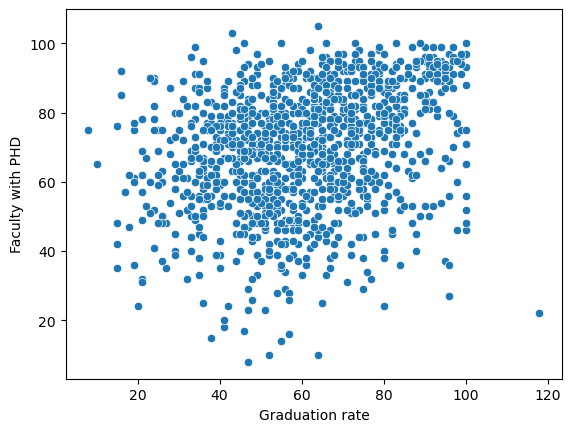

In [ ]:
sns.scatterplot(data=college_df, x='Graduation rate', y='Faculty with PHD')

<Axes: xlabel='Student to Faculty Ratio', ylabel='Graduation rate'>

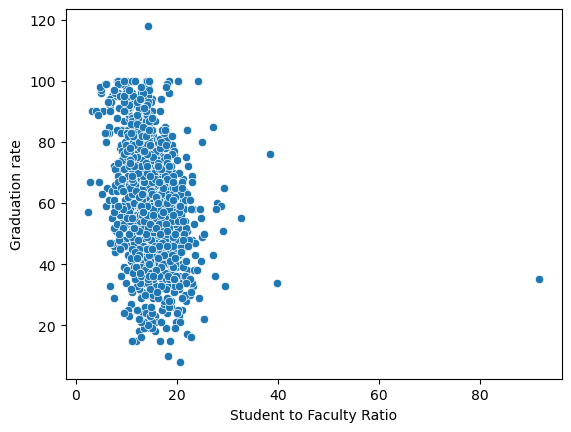

In [ ]:
sns.scatterplot(data=college_df, x='Student to Faculty Ratio', y='Graduation rate')

In [ ]:
## Desecribe with IQR outliers ranges Included

In [ ]:
# upper_dict = {}
# lower_dict = {}
# for index, row in college_describe_df.iterrows():
#     for col in college_describe_df.columns:
#         lower, upper = IQR_outlier_report(college_df, col)
#         upper_dict[col] = upper
#         lower_dict[col] = lower

# college_describe_df.loc['upper bound'] = upper_dict
# college_describe_df.loc['lower bound'] = lower_dict


# college_describe_df    
    

In [88]:

print(college_df.columns)
large_private_counts = large_applications_df['Public/Private'].value_counts()
public_private_expected_counts = college_df['Public/Private'].value_counts()

# Ensure the order of categories is consistent
large_private = [large_private_counts.get(cat, 0) for cat in public_private_expected_counts.index]
public_private_expected = [public_private_expected_counts.get(cat, 0) for cat in public_private_expected_counts.index]
from scipy import stats


print(stats.chisquare(large_private, public_private_expected))


Index(['State', 'Public/Private', 'Applicantions Received',
       'Applications Accepted', 'New Students Enrolled',
       '% New Students from Top 10%', '% New Students from Top 25%',
       '# FT undergrad', '# PT undergrad', 'in-state tuition',
       'out-of-state tuition', 'room', 'board', 'add. fees',
       'estim. book costs', 'Estimated Personal Cost', 'Faculty with PHD',
       'Student to Faculty Ratio', 'Graduation rate', 'Latitude', 'Longitude',
       'County', 'Address1', 'Address2', 'Zip Code', 'Region'],
      dtype='object')


NameError: name 'large_applications_df' is not defined

In [ ]:
print(college_df.columns)

# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    large_applications_df = college_df.loc[college_df['Applications Accepted'] > 2303, ["State",'Applications Accepted','Public/Private', 'Graduation rate'	] ]
    display(large_applications_df)
    


Index(['State', 'Public/Private', 'Applicantions Received',
       'Applications Accepted', 'New Students Enrolled',
       '% New Students from Top 10%', '% New Students from Top 25%',
       '# FT undergrad', '# PT undergrad', 'in-state tuition',
       'out-of-state tuition', 'room', 'board', 'add. fees',
       'estim. book costs', 'Estimated Personal Cost', 'Faculty with PHD',
       'Student to Faculty Ratio', 'Graduation rate'],
      dtype='object')


,State,Applications Accepted,Public/Private,Graduation rate
College Name,,,,
Alabama State University,AL,3272.0,1,15.0
Auburn University-Main Campus,AL,6791.0,1,69.0
University of Alabama at Tuscaloosa,AL,5972.0,1,50.0
Arkansas State University,AR,2633.0,1,39.0
University of Central Arkansas,AR,2703.0,1,36.0
University of Arkansas at Fayetteville,AR,3108.0,1,39.0
Arizona State University Main campus,AZ,10308.0,1,48.0
Northern Arizona University,AZ,4931.0,1,41.0
University of Arizona,AZ,12238.0,1,49.0


In [ ]:
large_applications_df.describe()

,# appl. accepted,Public (1)/ Private (2),Graduation rate
count,323.000000,323.000000,315.000000
mean,4744.944272,1.275542,60.123810
std,2877.087377,0.447480,18.591671
min,2306.000000,1.000000,10.000000
25%,2914.500000,1.000000,46.000000
50%,3700.000000,1.000000,58.000000
75%,5412.500000,2.000000,72.000000
max,26330.000000,2.000000,118.000000


In [87]:
large_private = [x for x in large_applications_df['Public/Private'].value_counts()]
public_private_expected=[x for x in college_df['Public/Private'].value_counts()]
print(large_private,public_private_expected)
chi2_stat, p_val = chisquare(large_private, public_private_expected)


NameError: name 'large_applications_df' is not defined

In [ ]:
large_applications_df['Public (1)/ Private (2)'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


1    72.4%
2    27.6%
Name: Public (1)/ Private (2), dtype: object

In [ ]:
public_private_expected=[x for x in college_df['Public (1)/ Private (2)'].value_counts()]


[832, 470]

In [ ]:
college_df['Public (1)/ Private (2)'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


2    63.9%
1    36.1%
Name: Public (1)/ Private (2), dtype: object

In [ ]:
c = stats.chisquare(private_pop, private_pop)


In [89]:
Totat_applications_accepted = college_df['# appl. accepted'].sum()
Totat_applications_accepted_top_25 = large_applications_df['# appl. accepted'].sum()

print(Totat_applications_accepted)
print(Totat_applications_accepted_top_25)

print(  f"Total Applications Accepted by 4th Quartile schools {round( (Totat_applications_accepted_top_25 / Totat_applications_accepted) *100 ,1 )} %" )

c = stats.chisquare(large_private, public_num)


KeyError: '# appl. accepted'

### Chi-Test of expected versus observed

In [90]:
Totat_applications_recieved = college_df['# appli. rec\'d'].sum()
Totat_applications_recieved_top_25 = large_applications_df['# appli. rec\'d'].sum()

print(Totat_applications_recieved)
print(Totat_applications_recieved_top_25)

print(  f"Total Applications Recieved by 4th Quartile schools {round( (Totat_applications_recieved_top_25 / Totat_applications_recieved) *100 ,1 )} %" )


KeyError: "# appli. rec'd"

In [ ]:
college_df[college_df['Applications Accepted']> ]['# appl. accepted'].sum()

,State,Public/Private,Applicantions Received,Applications Accepted,New Students Enrolled,% New Students from Top 10%,% New Students from Top 25%,# FT undergrad,# PT undergrad,in-state tuition,...,Faculty with PHD,Student to Faculty Ratio,Graduation rate,Latitude,Longitude,County,Address1,Address2,Zip Code,Region
College Name,,,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,...,76.0,11.9,15.0,57.440798,-152.354501,Kodiak Island Borough,Pacific Spaceport Complex Alaska,"Kodiak Island Borough, AK, United States of Am...",NaN,West
University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,...,67.0,10.0,NaN,61.563915,-149.229834,Matanuska-Susitna,University of Alaska Fairbanks Experimental Fa...,"Monitor Well Jeep Road, Matanuska-Susitna, AK,...",NaN,West
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,...,39.0,9.5,39.0,61.566670,-149.250830,Matanuska-Susitna Borough,University of Alaska Experimental Farm,"Gateway, AK, United States of America",NaN,West
University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,...,48.0,13.7,NaN,42.380002,-88.175800,Lake County,Anchorage,"Grant, IL, United States of America",NaN,West
Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,...,53.0,14.3,40.0,28.666383,-81.224953,Seminole County,Auto Mech and Muffler,"1301 Broadway Street, Oviedo, FL 32765, United...",32765,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,...,38.0,19.2,NaN,38.720281,-80.649428,NaN,West Virginia,United States of America,NaN,South
West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,...,83.0,13.4,57.0,39.633161,-79.954242,Monongalia County,West Virginia University Downtown Library,"1549 University Avenue, Morgantown, WV 26505, ...",26505,South
West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,...,58.0,16.4,67.0,38.421021,-82.443643,Cabell County,West Virginia Building,"9th Street, Huntington, WV 25701, United State...",25701,South


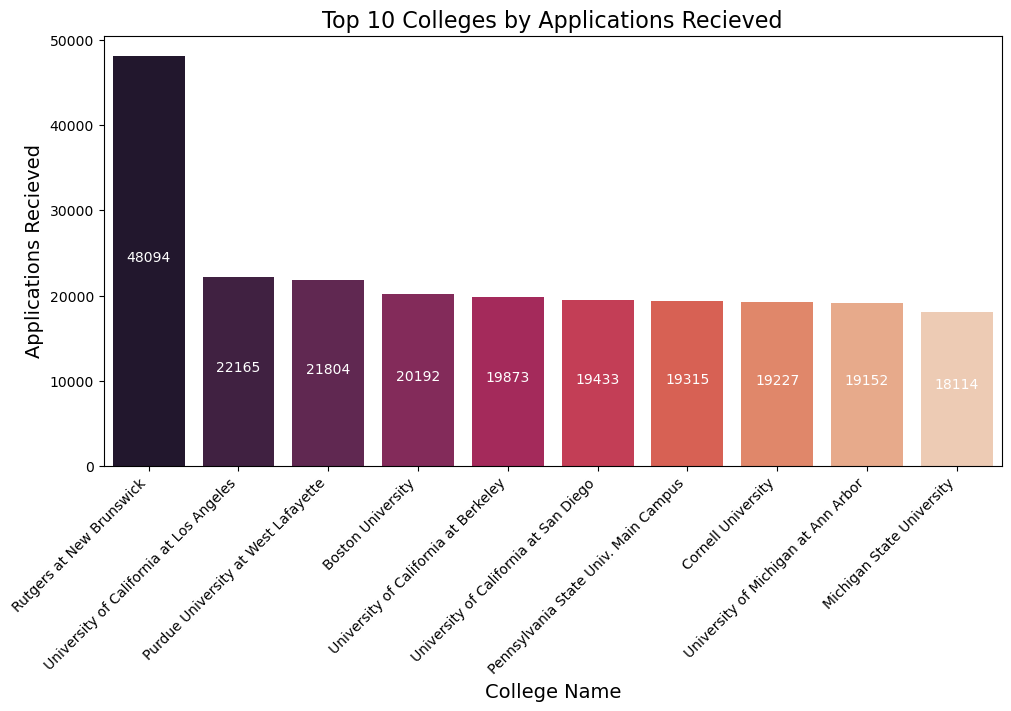

In [101]:
top10college_df=college_df[college_df['Applicantions Received'] > college_df['Applicantions Received'].quantile(.75)].sort_values(by='Applicantions Received', ascending=False).head(10)
top10college_df.reset_index(inplace=True)
top10college_df['Applicantions Received'] = top10college_df['Applicantions Received'].astype(int) 
fig,ax = plt.subplots(figsize=(10, 7),
                       layout='constrained')

ax = sns.barplot(x='College Name', y='Applicantions Received', data=top10college_df, 
                 palette='rocket')

plt.xticks(rotation=45, ha='right')
plt.xlabel('College Name', fontsize=14)
plt.ylabel('Applications Recieved', fontsize=14)
plt.title(label='Top 10 Colleges by Applications Recieved', fontsize=16)

for i, v in enumerate(top10college_df['Applicantions Received']):
   ax.text(i, v/2, str(v), ha='center', color='white')
plt.savefig('images/top10college_by_applications_Recieved.png', bbox_inches='tight')
plt.show()